In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Fumatori in europa !! salvate il dataset nel vostro drive

https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0810HEA,1.0/HEA_STYLE/HEA_STYLE_SMOK/IT1,83_63_DF_DCCV_AVQ_PERSONE_204,1.0

In [ ]:
import plotly.express as px
import pandas as pd
import os

# Percorso file CSV ISTAT
file_name = "/content/drive/MyDrive/visualizazzione/Abitudine al fumo - regioni e tipo di comune (IT1,83_63_DF_DCCV_AVQ_PERSONE_204,1.0).csv"

def generate_map():

    # 1. Verifica presenza file
    if not os.path.exists(file_name):
        print(f"ERRORE: Il file '{file_name}' non è stato trovato.")
        return

    try:
        # 2. Caricamento dati
        df_raw = pd.read_csv(file_name)

        # 3. Filtraggio dati (fumatori, percentuale, anno)
        mask = (
            (df_raw['MEASURE'] == 'HSC') &          # Percentuale
            (df_raw['DATA_TYPE'] == '14_FUMO_SI') & # Fumatori
            (df_raw['TIME_PERIOD'] == 2019) &       # Anno (modifica se serve)
            (df_raw['Territorio'] != 'Italia')      # Escludi totale nazionale
        )

        df = df_raw[mask].copy()

        if df.empty:
            print("Nessun dato trovato con i filtri impostati.")
            return

        # 4. Normalizzazione nomi regioni
        mapping_nomi = {
            "Valle d'Aosta / Vallée d'Aoste": "Valle d'Aosta/Vallée d'Aoste",
            "Trentino-Alto Adige / Südtirol": "Trentino-Alto Adige/Südtirol",
            "Friuli-Venezia Giulia": "Friuli Venezia Giulia"
        }
        df['Territorio'] = df['Territorio'].str.strip().replace(mapping_nomi)

        # 5. Conversione valori in numerico
        df['Osservazione'] = pd.to_numeric(df['Osservazione'], errors='coerce')
        df.dropna(subset=['Osservazione'], inplace=True)

        # 6. Media regionale (se più righe per tipo di comune)
        df_plot = df.groupby('Territorio', as_index=False)['Osservazione'].mean()

        # 7. GeoJSON Regioni Italiane
        geojson_url = "https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson"

        # 8. Creazione mappa choropleth (PROIEZIONE PIANA)
        fig = px.choropleth(
            df_plot,
            geojson=geojson_url,
            locations='Territorio',
            featureidkey='properties.reg_name',
            color='Osservazione',
            color_continuous_scale="Reds",
            hover_name='Territorio',
            hover_data={
                'Osservazione': ':.1f'
            },
            labels={'Osservazione': 'Fumatori (%)'},
            title='<b>Percentuale di fumatori per Regione</b><br>Dati ISTAT'
        )

        # 9. Eliminazione prospet tiva / vista piana
        fig.update_geos(
            projection_type="mercator",
            visible=False,
            fitbounds="locations"
        )

        # 10. Layout e colorbar
        fig.update_layout(
            margin={"r":0,"t":80,"l":0,"b":0},
            coloraxis_colorbar=dict(
                title="%",
                thickness=18,
                len=0.7,
                tickformat=".0f"
            ),
            font=dict(family="Arial")
        )

        fig.show()

    except Exception as e:
        print(f"Errore durante l'elaborazione: {e}")

# Esecuzione
generate_map()


# 9.FUMATORI IN ITALIA (2001-2024)

In [ ]:
import plotly.express as px
import pandas as pd
import os

file_name = "/content/drive/MyDrive/Visualizzazione/Fumatori2001-2024_linee.csv"

def generate_line_chart():

    # Verifica presenza file
    if not os.path.exists(file_name):
        print(f"ERRORE: Il file '{file_name}' non è stato trovato.")
        return

    try:
        # Caricamento dati
        df_raw = pd.read_csv(file_name)

        # Filtraggio dati: fumatori (DATA_TYPE = 14_FUMO_SI) e misura percentuale (HSC)
        mask = (
            (df_raw['DATA_TYPE'] == '14_FUMO_SI') &
            (df_raw['MEASURE'] == 'HSC')
        )

        df = df_raw[mask].copy()

        if df.empty:
            print("Nessun dato trovato con i filtri impostati.")
            return

        # Conversione colonne numeriche
        df['TIME_PERIOD'] = pd.to_numeric(df['TIME_PERIOD'], errors='coerce')
        df['Osservazione'] = pd.to_numeric(df['Osservazione'], errors='coerce')
        df.dropna(subset=['TIME_PERIOD', 'Osservazione'], inplace=True)

        # Creazione grafico a linee
        fig = px.line(
            df,
            x='TIME_PERIOD',
            y='Osservazione',
            color='AGE',
            markers=True,
            labels={
                'TIME_PERIOD': 'Anno',
                'Osservazione': 'Fumatori (%)',
                'AGE': 'Fascia d’età'
            },
            title='<b>Andamento dei fumatori per fascia d’età (2001–2024)</b><br>Dati ISTAT'
        )

        #Layout
        fig.update_layout(
          font=dict(family="Arial", size=14),
          legend_title_text="Fascia d’età",
          hovermode="x unified",
          legend=dict(
            orientation="v",
            x=1.02,
            y=1,
            xanchor="left",
            yanchor="top"
          ),
          margin=dict(r=180)
        )


        fig.show()

    except Exception as e:
        print(f"Errore durante l'elaborazione: {e}")


generate_line_chart()

#10.

In [ ]:
import plotly.express as px
import pandas as pd
import os

file_name = "/content/drive/MyDrive/Visualizzazione/Fumatori14-17anni_barreverticali.csv"

def generate_bar_chart():

    # Controllo file
    if not os.path.exists(file_name):
        print(f"ERRORE: Il file '{file_name}' non è stato trovato.")
        return

    try:
        # Caricamento dati
        df_raw = pd.read_csv(file_name)

        # Filtraggio (fumatori SI + percentuale)
        mask = (
            (df_raw['DATA_TYPE'] == '14_FUMO_SI') &
            (df_raw['MEASURE'] == 'HSC') &
            (df_raw['AGE'] == 'Y14-17')
        )

        df = df_raw[mask].copy()

        if df.empty:
            print("Nessun dato trovato con i filtri impostati.")
            return

        # Conversione colonne
        df['TIME_PERIOD'] = pd.to_numeric(df['TIME_PERIOD'], errors='coerce')
        df['Osservazione'] = pd.to_numeric(df['Osservazione'], errors='coerce')
        df.dropna(subset=['TIME_PERIOD', 'Osservazione'], inplace=True)

        df = df.sort_values("TIME_PERIOD")

        # Grafico a barre verticali
        fig = px.bar(
            df,
            x='TIME_PERIOD',
            y='Osservazione',
            text='Osservazione',
            labels={
                'TIME_PERIOD': 'Anno',
                'Osservazione': 'Fumatori (%)'
            },
            title='<b>Percentuale fumatori 14–17 anni (2001–2024)</b><br>Dati ISTAT'
        )

        # Layout
        fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
        fig.update_layout(
            font=dict(family="Arial", size=14),
            yaxis_range=[0, df["Osservazione"].max() + 4]
        )

        fig.show()

    except Exception as e:
        print(f"Errore durante l'elaborazione: {e}")


generate_bar_chart()

ERRORE: Il file '/content/drive/MyDrive/Visualizzazione/Fumatori14-17anni_barreverticali.csv' non è stato trovato.


# 11.

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import os

file_name = "/content/drive/MyDrive/Visualizzazione/Fumatorinuovi2001-2024_radar.csv"

def generate_radar_chart():

    if not os.path.exists(file_name):
        print(f"ERRORE: Il file '{file_name}' non è stato trovato.")
        return

    try:
        df = pd.read_csv(file_name)

        # Conversione colonne
        df["TIME_PERIOD"] = pd.to_numeric(df["TIME_PERIOD"], errors="coerce")
        df["Osservazione"] = pd.to_numeric(df["Osservazione"], errors="coerce")
        df.dropna(subset=["TIME_PERIOD", "Osservazione"], inplace=True)

        # Ordina per anno
        df = df.sort_values("TIME_PERIOD")

        # Dati radar
        years = df["TIME_PERIOD"].astype(int).astype(str).tolist()
        values = df["Osservazione"].tolist()

        # chiusura poligono
        years.append(years[0])
        values.append(values[0])

        # Grafico radar
        fig = go.Figure()
        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=years,
            fill="toself",
            line=dict(width=3)
        ))

        fig.update_layout(
            title="<b>Nuovi fumatori in Italia (2001–2024)</b><br>Numero assoluto",
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[0, max(values) * 1.15]
                )
            ),
            font=dict(family="Arial", size=14),
            showlegend=False
        )

        fig.show()

    except Exception as e:
        print(f"Errore: {e}")

generate_radar_chart()

#12.

In [ ]:
import plotly.express as px
import pandas as pd
import os

file_name = "/content/drive/MyDrive/Visualizzazione/Fumatori&non14-17_area.csv"

def generate_area_chart():

    if not os.path.exists(file_name):
        print(f"ERRORE: Il file '{file_name}' non è stato trovato.")
        return

    try:
        # 1. Caricamento dati
        df = pd.read_csv(file_name)

        # 2. Conversione numerica
        df["TIME_PERIOD"] = pd.to_numeric(df["TIME_PERIOD"], errors="coerce")
        df["Osservazione"] = pd.to_numeric(df["Osservazione"], errors="coerce")
        df.dropna(subset=["TIME_PERIOD", "Osservazione"], inplace=True)

        # 3. Ordina per anno
        df = df.sort_values("TIME_PERIOD")

        # 4. Grafico ad area
        fig = px.area(
            df,
            x="TIME_PERIOD",
            y="Osservazione",
            color="DATA_TYPE",
            groupnorm=None,
            labels={
                "TIME_PERIOD": "Anno",
                "Osservazione": "Percentuale (%)",
                "DATA_TYPE": "Stato"
            },
            title="<b>Fumatori e Non fumatori 14–17 anni</b><br>Andamento nel tempo"
        )

        # 5. Layout
        fig.update_layout(
            font=dict(family="Arial", size=14),
            hovermode="x unified"
        )

        fig.show()

    except Exception as e:
        print(f"Errore: {e}")

generate_area_chart()

# 15.


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# 1. Caricamento del dataset
# Nota: assicurati che il percorso sia corretto nel tuo ambiente
file_path = '/content/drive/MyDrive/visualizazzione/ex_smokers.csv'
df = pd.read_csv(file_path)

# 2. Filtraggio dati (Ex fumatori, Totale, 14+ anni, Valore assoluto THV)
df_filtered = df[
    (df['DATA_TYPE'] == '14_FUMO_EX') &
    (df['SEX'] == 9) &
    (df['AGE'] == 'Y_GE14') &
    (df['MEASURE'] == 'THV')
].copy()

# Ordinamento per anno
df_filtered = df_filtered.sort_values(by='TIME_PERIOD')

# 3. Creazione del grafico con Plotly Express
fig = px.line(
    df_filtered,
    x='TIME_PERIOD',
    y='Osservazione',
    markers=True,
    labels={
        'TIME_PERIOD': 'Anno',
        'Osservazione': 'Ex Fumatori (migliaia)'
    },
    title='<b>Evoluzione Ex Fumatori e Leggi antifumo in Italia</b><br>Dati ISTAT - Ex Fumatori (14+ anni)'
)

# 4. Aggiunta delle tappe legislative (Milestones)
milestones = {
    2005: "Legge Sirchia<br>(Chiuso)",
    2016: "Direttiva UE<br>(Immagini Shock)",
    2021: "Divieti aperto<br>(10m)"
}

for year, label in milestones.items():
    # Aggiunta linea verticale
    fig.add_vline(x=year, line_dash="dash", line_color="red", opacity=0.6)

    # Aggiunta etichetta testuale
    fig.add_annotation(
        x=year,
        y=1.02, # Posiziona sopra il grafico
        yref="paper",
        text=label,
        showarrow=False,
        font=dict(color="red", size=10, family="Arial Black"),
        bgcolor="white",
        bordercolor="red",
        borderwidth=1,
        opacity=0.8
    )

# 5. Personalizzazione del Layout (Stile richiesto)
fig.update_layout(
    font=dict(family="Arial", size=14),
    hovermode="x unified",
    xaxis=dict(
        tickmode='array',
        tickvals=df_filtered['TIME_PERIOD'].unique(),
        tickangle=45
    ),
    yaxis_title="Migliaia di persone",
    plot_bgcolor='white',
    margin=dict(t=100, b=50, l=50, r=50)
)

# Aggiunta della griglia orizzontale
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

# Mostra il grafico
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# 1. Caricamento del dataset
file_path = '/content/drive/MyDrive/visualizazzione/ex_smokers.csv'
df = pd.read_csv(file_path)

# Pulizia e conversione
df['TIME_PERIOD'] = pd.to_numeric(df['TIME_PERIOD'], errors='coerce')
df['Osservazione'] = pd.to_numeric(df['Osservazione'], errors='coerce')
df = df.dropna(subset=['TIME_PERIOD', 'Osservazione'])

# 2. Aggregazione in 3 macro-categorie d'età
# Mappiamo le micro-fasce ISTAT in 3 gruppi logici
age_mapping = {
    'Y14-17': '14-34 anni', 'Y18-19': '14-34 anni', 'Y20-24': '14-34 anni', 'Y25-34': '14-34 anni',
    'Y35-44': '35-64 anni', 'Y45-54': '35-64 anni', 'Y55-59': '35-64 anni', 'Y60-64': '35-64 anni',
    'Y65-74': '65+ anni', 'Y_GE75': '65+ anni'
}
df['Age_Group_Agg'] = df['AGE'].map(age_mapping)

# Definizione tappe legislative (Milestones)
milestones = {
    2005: "Legge Sirchia<br>(Chiuso)",
    2016: "Direttiva UE<br>(Immagini Shock)",
    2021: "Divieti aperto<br>(10m)"
}

def apply_layout_style(fig, title, y_label):
    """Applica lo stile uniforme e le linee delle leggi"""
    for year, label in milestones.items():
        fig.add_vline(x=year, line_dash="dash", line_color="red", opacity=0.4)
        fig.add_annotation(
            x=year, y=1.05, yref="paper", text=label, showarrow=False,
            font=dict(color="red", size=10, family="Arial Black"),
            bgcolor="white", opacity=0.8
        )
    fig.update_layout(
        title=f"<b>{title}</b>",
        font=dict(family="Arial", size=14),
        hovermode="x unified",
        plot_bgcolor='white',
        xaxis=dict(showgrid=False, tickangle=45),
        yaxis=dict(title=y_label, showgrid=True, gridcolor='LightGray'),
        margin=dict(t=120, b=50, l=50, r=50)
    )

# --- GRAFICO 1: TREND TEMPORALE (3 CATEGORIE) ---
# Filtriamo: Totale (SEX=9), Valori in Migliaia (THV), e solo le righe mappate nelle 3 categorie
df_3_age = df[
    (df['SEX'] == 9) &
    (df['MEASURE'] == 'THV') &
    (df['Age_Group_Agg'].notna())
].groupby(['TIME_PERIOD', 'Age_Group_Agg'])['Osservazione'].sum().reset_index()

fig1 = px.line(
    df_3_age, x='TIME_PERIOD', y='Osservazione', color='Age_Group_Agg', markers=True,
    labels={'TIME_PERIOD': 'Anno', 'Osservazione': 'Ex Fumatori (Migliaia)', 'Age_Group_Agg': 'Fascia d\'Età'}
)
apply_layout_style(fig1, "Andamento Ex Fumatori per Macro-Fasce d'Età", "Migliaia di persone")
fig1.show()

# --- GRAFICO 2: BARRE DISTRIBUZIONE (ULTIMO ANNO) ---
last_year = df_3_age['TIME_PERIOD'].max()
df_last_3 = df_3_age[df_3_age['TIME_PERIOD'] == last_year].sort_values('Osservazione', ascending=False)

fig2 = px.bar(
    df_last_3, x='Age_Group_Agg', y='Osservazione', color='Age_Group_Agg',
    labels={'Osservazione': 'Ex Fumatori (Migliaia)', 'Age_Group_Agg': 'Fascia d\'Età'},
    title=f"<b>Confronto Volumi Ex Fumatori nel {last_year}</b>",
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig2.update_layout(plot_bgcolor='white', showlegend=False, yaxis_title="Migliaia di persone")
fig2.show()



#16/17. tipologie di fumo

In [ ]:
import plotly.graph_objects as go

# 1. Dati
categorie = [
    "Solo sigarette tradizionali",
    "Solo sigaretta elettronica",
    "Solo tabacco riscaldato",
    "Sigarette tradizionali + elettronica",
    "Sigarette tradizionali + tabacco riscaldato",
    "Tabacco riscaldato + elettronica",
    "Tutti e tre i prodotti",
    "Policonsumo"
]

percentuali = [13.3, 13.9, 10.4, 11.0, 15.1, 9.3, 27.0, 62.4]

# Mappatura colori (aggiunto il viola per il Policonsumo come totale)
colori = [
    "#4C72B0",  # Solo tradizionali (Blu)
    "#4C72B0",  # Solo elettronica
    "#4C72B0",  # Solo tabacco riscaldato
    "#DD8452",  # Tradizionali + elettronica (Arancio)
    "#DD8452",  # Tradizionali + tabacco riscaldato
    "#DD8452",  # Tabacco riscaldato + elettronica
    "#C44E52",  # Tutti e tre (Rosso)
    "#7b1fa2"   # Policonsumo (Viola - Evidenziazione)
]

# 2. Inversione liste per visualizzazione corretta (dall'alto in basso) in Plotly
categorie = categorie[::-1]
percentuali = percentuali[::-1]
colori = colori[::-1]

# 3. Creazione del grafico
fig = go.Figure()

fig.add_trace(go.Bar(
    y=categorie,
    x=percentuali,
    orientation='h',
    marker=dict(color=colori),
    text=[f"{p}%" for p in percentuali], # Etichette percentuali
    textposition='outside', # Posizionate fuori dalla barra
    textfont=dict(family="Arial Black", size=13, color="black")
))

# 4. Layout e Stile (Nuovo stile)
fig.update_layout(
    title=dict(
        text="<b>Utilizzo esclusivo e policonsumo di prodotti del tabacco (14-17 anni) 2023/2024</b><br>" +
             "<span style='font-size: 12px; color: gray;'>Fonte: Rapporto Nazionale sul Tabagismo 2023/2024</span>",
        font=dict(size=20, family="Arial", color="#333333"),
        pad=dict(b=40) # Padding tra titolo e grafico
    ),
    template="plotly_white",
    height=600,
    margin=dict(l=20, r=50, t=120, b=50), # Margini ottimizzati
    xaxis=dict(
        showgrid=False,
        showticklabels=False,
        range=[0, 75] # Spazio extra per l'etichetta della barra più lunga (62.4%)
    ),
    yaxis=dict(
        showgrid=False,
        tickfont=dict(size=13, family="Arial")
    )
)

fig.show()

In [ ]:
import plotly.graph_objects as go

# 1. Dati
categorie = [
    "Solo sigarette tradizionali",
    "Solo sigaretta elettronica",
    "Solo tabacco riscaldato",
    "Sigarette tradizionali + elettronica",
    "Sigarette tradizionali + tabacco riscaldato",
    "Tabacco riscaldato + elettronica",
    "Tutti e tre i prodotti",
    "Policonsumo"
]

percentuali = [26.9, 26.6, 7.8, 13.3, 5.5, 3.3, 16.6, 38.7]

# Mappatura colori (aggiunto il viola per il Policonsumo come totale)
colori = [
    "#4C72B0",  # Solo tradizionali (Blu)
    "#4C72B0",  # Solo elettronica
    "#4C72B0",  # Solo tabacco riscaldato
    "#DD8452",  # Tradizionali + elettronica (Arancio)
    "#DD8452",  # Tradizionali + tabacco riscaldato
    "#DD8452",  # Tabacco riscaldato + elettronica
    "#C44E52",  # Tutti e tre (Rosso)
    "#7b1fa2"   # Policonsumo (Viola - Evidenziazione)
]

# 2. Inversione liste per visualizzazione corretta (dall'alto in basso) in Plotly
categorie = categorie[::-1]
percentuali = percentuali[::-1]
colori = colori[::-1]

# 3. Creazione del grafico
fig = go.Figure()

fig.add_trace(go.Bar(
    y=categorie,
    x=percentuali,
    orientation='h',
    marker=dict(color=colori),
    text=[f"{p}%" for p in percentuali], # Etichette percentuali
    textposition='outside', # Posizionate fuori dalla barra
    textfont=dict(family="Arial Black", size=13, color="black")
))

# 4. Layout e Stile (Nuovo stile)
fig.update_layout(
    title=dict(
        text="<b>Utilizzo esclusivo e policonsumo di prodotti del tabacco (14-17 anni) 2023/2024</b><br>" +
             "<span style='font-size: 12px; color: gray;'>Fonte: Rapporto Nazionale sul Tabagismo 2023/2024</span>",
        font=dict(size=20, family="Arial", color="#333333"),
        pad=dict(b=40) # Padding tra titolo e grafico
    ),
    template="plotly_white",
    height=600,
    margin=dict(l=20, r=50, t=120, b=50), # Margini ottimizzati
    xaxis=dict(
        showgrid=False,
        showticklabels=False,
        range=[0, 75] # Spazio extra per l'etichetta della barra più lunga (62.4%)
    ),
    yaxis=dict(
        showgrid=False,
        tickfont=dict(size=13, family="Arial")
    )
)

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Dati estratti
# NOTA: Ho aggiunto la virgola mancante tra "Tutti e tre i prodotti" e "Policonsumo"
categories = [
    "Sigaretta tradizionale",
    "Tabacco riscaldato",
    "Sigaretta elettronica",
    "Sigaretta tradizionale e tabacco riscaldato",
    "Sigaretta tradizionale e sigaretta elettronica",
    "Tabacco riscaldato e sigaretta elettronica",
    "Tutti e tre i prodotti",
    "Policonsumo"
]

# Invertiamo per ordine di visualizzazione (dall'alto in basso)
categories = categories[::-1]

# Dati
daily_values = [61.3, 14.3, 10.1, 7.4, 2.9, 2.0, 1.9, 14.2][::-1]
monthly_values = [35.7, 11.3, 12.5, 14.7, 11.9, 7.6, 6.2, 40.4][::-1]

# 2. Configurazione Subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("<b>CONSUMO GIORNALIERO</b>", "<b>CONSUMO ULTIMI 30 GIORNI</b>"),
    shared_yaxes=True,
    horizontal_spacing=0.1
)

# 3. Traccia Sinistra (Arancione)
fig.add_trace(
    go.Bar(
        y=categories,
        x=daily_values,
        orientation='h',
        name="Giornaliero",
        marker=dict(color='#ff5722'),
        text=[f"{val}%" for val in daily_values],
        textposition='outside',
        textfont=dict(color='black', size=13, family="Arial Black")
    ),
    row=1, col=1
)

# 4. Traccia Destra (Viola)
fig.add_trace(
    go.Bar(
        y=categories,
        x=monthly_values,
        orientation='h',
        name="Ultimi 30gg",
        marker=dict(color='#7b1fa2'),
        text=[f"{val}%" for val in monthly_values],
        textposition='outside',
        textfont=dict(color='black', size=13, family="Arial Black")
    ),
    row=1, col=2
)

# 5. Funzione Parentesi (modificata leggermente per adattarsi ai nuovi indici se necessario)
def add_bracket(fig, x_pos, y_start, y_end, text_val, col):
    fig.add_shape(type="line", x0=x_pos, y0=y_start, x1=x_pos, y1=y_end,
                  line=dict(color="red", width=2), row=1, col=col)
    fig.add_shape(type="line", x0=x_pos, y0=y_start, x1=x_pos-2, y1=y_start,
                  line=dict(color="red", width=2), row=1, col=col)
    fig.add_shape(type="line", x0=x_pos, y0=y_end, x1=x_pos-2, y1=y_end,
                  line=dict(color="red", width=2), row=1, col=col)
    fig.add_shape(type="line", x0=x_pos, y0=(y_start+y_end)/2, x1=x_pos+2, y1=(y_start+y_end)/2,
                  line=dict(color="red", width=2), row=1, col=col)
    fig.add_annotation(
        x=x_pos + 8, y=(y_start+y_end)/2,
        text=f"<b>{text_val}</b>",
        showarrow=False,
        font=dict(color="red", size=18, family="Arial Black"),
        row=1, col=col
    )


# 6. Layout con PADDING AGGIUNTO
fig.update_layout(
    # Configurazione Titolo con Padding
    title=dict(
        text="<b>Sigarette tradizionali, HTP, e-cig: utilizzo esclusivo e policonsumo adulti</b><br>" +
             "<span style='font-size: 12px; color: gray;'>Fonte: Rapporto Nazionale sul Tabagismo 2024 (Istituto Superiore di Sanità)</span>",
        font=dict(size=20, color="#4a148c", family="Arial"),
        # QUI AGGIUNGIAMO IL PADDING
        pad=dict(b=50)  # b=50 aggiunge 50 pixel di spazio SOTTO il titolo
    ),
    template="plotly_white",
    showlegend=False,
    # Aumentiamo il margine superiore (t) per accomodare titolo + padding senza tagliare nulla
    margin=dict(l=250, r=50, t=140, b=50),
    height=700, # Altezza leggermente aumentata
    hovermode=False
)

fig.update_xaxes(showgrid=False, showticklabels=False, range=[0, 85])
fig.update_yaxes(showgrid=False)

fig.show()

#18.

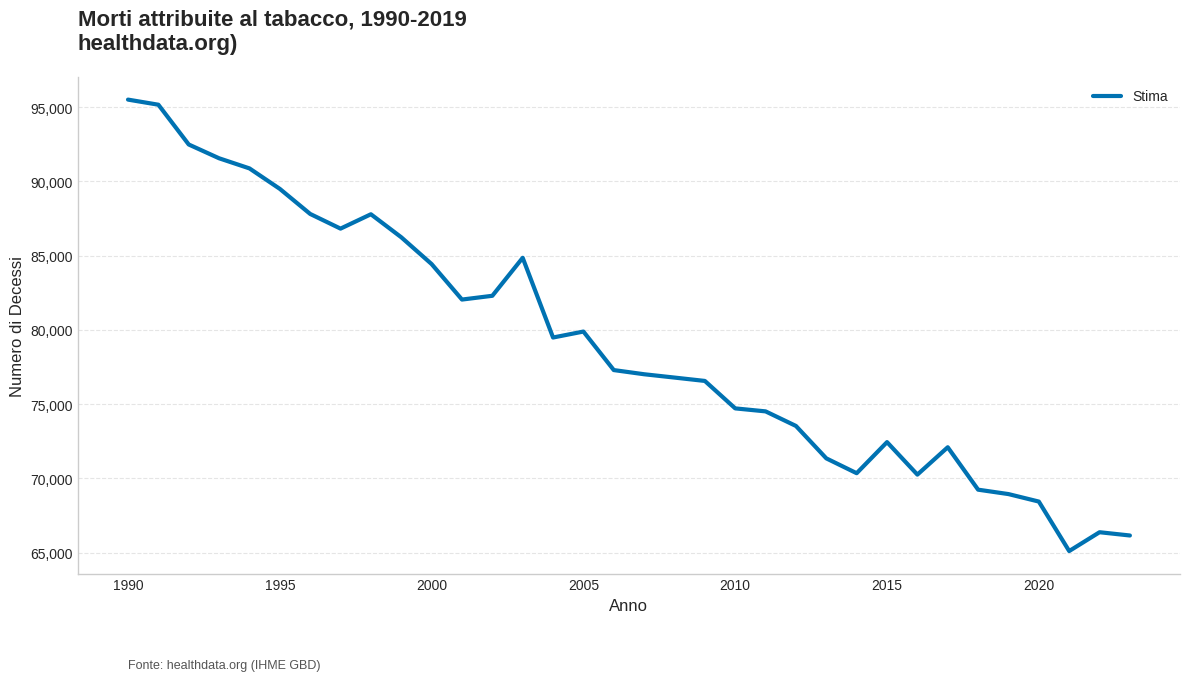

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# 1. Caricamento e pulizia dati
df = pd.read_csv('/content/drive/MyDrive/visualizazzione/morti.csv')
# Rimuoviamo eventuali righe vuote e ordiniamo per anno
df = df.dropna(subset=['Year', 'Value', 'Lower bound', 'Upper bound'])
df = df.sort_values('Year')

# 2. Configurazione stile IHME
plt.style.use('seaborn-v0_8-whitegrid') # Base pulita
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.spines.top'] = False    # Rimuove bordo superiore
plt.rcParams['axes.spines.right'] = False  # Rimuove bordo destro

# Creazione della figura
plt.figure(figsize=(12, 7))



# 4. Disegno della linea principale (Mean Value)
plt.plot(
    df['Year'],
    df['Upper bound'],
    color='#0072b2',
    linewidth=3,
    label='Stima'
)

# 5. Formattazione e dettagli
location = df['Location'].iloc[0]
risk_factor = df['Risk factor'].iloc[0]

plt.title(f'Morti attribuite al tabacco, 1990-2019\nhealthdata.org)',
          fontsize=16, pad=20, fontweight='bold', loc='left')

plt.xlabel('Anno', fontsize=12)
plt.ylabel('Numero di Decessi', fontsize=12)

# Formattazione asse Y con separatore delle migliaia
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Griglia solo orizzontale per migliorare la leggibilità
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', visible=False)

# Legenda minimalista
plt.legend(frameon=False, loc='upper right', fontsize=10)

# Nota della fonte a fondo pagina
plt.text(df['Year'].min(), plt.ylim()[0] * 0.9,
         'Fonte: healthdata.org (IHME GBD)', fontsize=9, color='#555555')

plt.tight_layout()

# Salvataggio
plt.savefig('grafico_stile_healthdata.png', dpi=300)

# STORIA DEL CONSUMO DEI FUMATORI DI SIGARETTA TRADIZIONALE (ULTIMI 30 GG)

In [ ]:
import plotly.graph_objects as go

# --- 1. CONFIGURAZIONE E HELPER ---
TOTAL_POPULATION = 100

# Funzione per convertire HEX in RGBA (risolve il tuo errore)
def hex_to_rgba(hex_color, alpha=0.4):
    hex_color = hex_color.lstrip('#')
    if len(hex_color) == 6:
        r = int(hex_color[0:2], 16)
        g = int(hex_color[2:4], 16)
        b = int(hex_color[4:6], 16)
        return f'rgba({r},{g},{b},{alpha})'
    return hex_color

# Palette Colori (Standardizzate)
COLORS = {
    "TRAD": "#4D4D4D",  # Grigio Scuro
    "HTP": "#2E86C1",   # Blu
    "ECIG": "#E67E22",  # Arancione
    "START": "#17202A"  # Nero/Grigio molto scuro
}

# --- 2. DEFINIZIONE NODI ---
# Indici definiti manualmente per garantire l'ordine
# 0: Start
# 1-3: Livello 1 (Primo Prodotto)
# 4-12: Livello 2 (Intermedi)
# 13-18: Livello 3 (DESTINAZIONI FINALI - Le 6 Chiavi richieste)

labels = [
    "Totale Fumatori",                                      # 0
    "Prova TRAD (1°)", "Prova HTP (1°)", "Prova ECIG (1°)", # 1, 2, 3
    # Intermedi (servono per instradare il flusso ma non sono terminali)
    "Fumo TRAD (int)", "Prova HTP (int)", "Prova ECIG (int)", # 4, 5, 6
    "Prova TRAD (int)", "Fumo HTP (int)", "Prova ECIG (int)", # 7, 8, 9
    "Prova TRAD (int)", "Prova HTP (int)", "Fumo ECIG (int)", # 10, 11, 12
    # LE 6 CHIAVI FINALI
    "FUMO TRAD", "FUMO HTP", "FUMO ECIG",                   # 13, 14, 15
    "PROVA TRAD", "PROVA HTP", "PROVA ECIG"                 # 16, 17, 18
]

# Assegnazione Colori ai Nodi
node_colors = [
    COLORS["START"],
    COLORS["TRAD"], COLORS["HTP"], COLORS["ECIG"],
    COLORS["TRAD"], COLORS["HTP"], COLORS["ECIG"],
    COLORS["TRAD"], COLORS["HTP"], COLORS["ECIG"],
    COLORS["TRAD"], COLORS["HTP"], COLORS["ECIG"],
    COLORS["TRAD"], COLORS["HTP"], COLORS["ECIG"], # Finali Fumo
    COLORS["TRAD"], COLORS["HTP"], COLORS["ECIG"]  # Finali Prova
]

source = []
target = []
value = []
link_colors = []

# Helper per aggiungere i flussi in modo pulito
def add_flow(src, tgt, val, color_key):
    source.append(src)
    target.append(tgt)
    value.append(val)
    # Usa la funzione hex_to_rgba per evitare l'errore ValueError
    link_colors.append(hex_to_rgba(COLORS[color_key], 0.4))

# --- 3. CALCOLO DEI FLUSSI ---

# LIVELLO 1: Da Totale a Primo Tentativo
v_L1_Trad = TOTAL_POPULATION * 0.594
v_L1_Htp = TOTAL_POPULATION * 0.055
v_L1_Ecig = TOTAL_POPULATION * 0.351

add_flow(0, 1, v_L1_Trad, "TRAD")
add_flow(0, 2, v_L1_Htp, "HTP")
add_flow(0, 3, v_L1_Ecig, "ECIG")

# LIVELLO 2 & 3: Sviluppo dei Rami

# --- Ramo TRAD (Nodo 1) ---
v_1_FumoTrad = v_L1_Trad * 0.390
v_1_ProvaHtp = v_L1_Trad * 0.191
v_1_ProvaEcig = v_L1_Trad * 0.419

add_flow(1, 4, v_1_FumoTrad, "TRAD")
add_flow(1, 5, v_1_ProvaHtp, "HTP")
add_flow(1, 6, v_1_ProvaEcig, "ECIG")

# Dal nodo intermedio 4 (Fumo TRAD) -> Finali
add_flow(4, 17, v_1_FumoTrad * 0.423, "HTP")  # -> PROVA HTP
add_flow(4, 18, v_1_FumoTrad * 0.523, "ECIG") # -> PROVA ECIG
# (Nota: STOP 5.4% omesso per richiesta "solo 6 chiavi")

# Dal nodo intermedio 5 (Prova HTP) -> Finali
add_flow(5, 13, v_1_ProvaHtp * 0.175, "TRAD") # -> FUMO TRAD
add_flow(5, 14, v_1_ProvaHtp * 0.156, "HTP")  # -> FUMO HTP
add_flow(5, 18, v_1_ProvaHtp * 0.669, "ECIG") # -> PROVA ECIG

# Dal nodo intermedio 6 (Prova ECIG) -> Finali
add_flow(6, 13, v_1_ProvaEcig * 0.192, "TRAD")
add_flow(6, 17, v_1_ProvaEcig * 0.496, "HTP")
add_flow(6, 15, v_1_ProvaEcig * 0.311, "ECIG")


# --- Ramo HTP (Nodo 2) ---
v_2_ProvaTrad = v_L1_Htp * 0.483
v_2_FumoHtp = v_L1_Htp * 0.232
v_2_ProvaEcig = v_L1_Htp * 0.285

add_flow(2, 7, v_2_ProvaTrad, "TRAD")
add_flow(2, 8, v_2_FumoHtp, "HTP")
add_flow(2, 9, v_2_ProvaEcig, "ECIG")

# Dai nodi intermedi -> Finali
add_flow(7, 13, v_2_ProvaTrad * 0.267, "TRAD")
add_flow(7, 14, v_2_ProvaTrad * 0.267, "HTP")
add_flow(7, 18, v_2_ProvaTrad * 0.466, "ECIG")

add_flow(8, 16, v_2_FumoHtp * 0.524, "TRAD")
add_flow(8, 18, v_2_FumoHtp * 0.476, "ECIG")

add_flow(9, 16, v_2_ProvaEcig * 0.650, "TRAD")
add_flow(9, 14, v_2_ProvaEcig * 0.201, "HTP")
add_flow(9, 15, v_2_ProvaEcig * 0.148, "ECIG")


# --- Ramo ECIG (Nodo 3) ---
v_3_ProvaTrad = v_L1_Ecig * 0.467
v_3_ProvaHtp = v_L1_Ecig * 0.260
v_3_FumoEcig = v_L1_Ecig * 0.273

add_flow(3, 10, v_3_ProvaTrad, "TRAD")
add_flow(3, 11, v_3_ProvaHtp, "HTP")
add_flow(3, 12, v_3_FumoEcig, "ECIG")

# Dai nodi intermedi -> Finali
add_flow(10, 13, v_3_ProvaTrad * 0.174, "TRAD")
add_flow(10, 17, v_3_ProvaTrad * 0.602, "HTP")
add_flow(10, 15, v_3_ProvaTrad * 0.224, "ECIG")

add_flow(11, 16, v_3_ProvaHtp * 0.842, "TRAD")
add_flow(11, 14, v_3_ProvaHtp * 0.050, "HTP")
add_flow(11, 15, v_3_ProvaHtp * 0.107, "ECIG")

add_flow(12, 16, v_3_FumoEcig * 0.684, "TRAD")
add_flow(12, 17, v_3_FumoEcig * 0.316, "HTP")


# --- 4. VISUALIZZAZIONE ---
fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = " Utenti",
    node=dict(
        pad=30,
        thickness=20,
        line=dict(color="white", width=1),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
)])

fig.update_layout(
    title_text="<b>Storia del consumo dei fumatori di sigaretta tradizionale(ultimi 30 giorni rispetto al sondaggio)</b><br><span style='font-size:12px;color:grey'>fonte: Rapporto Nazionale sul Tabagismo 2024</span>",
    font=dict(size=14, color="#2c3e50", family="Arial"),
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=800,
)

fig.show()

# 21. Spesa procapite per il fumo

In [ ]:
import pandas as pd
import plotly.express as px
import os

# 1. Configurazione Percorsi e Dati Statici
path = "/content/drive/MyDrive/visualizazzione/consumo_medio.csv"

prezzi_pacco = {
    2000: 2.05, 2001: 2.15, 2002: 2.76, 2003: 3.12, 2004: 3.28,
    2005: 3.48, 2006: 3.65, 2007: 3.80, 2008: 3.86, 2009: 4.02,
    2010: 4.11, 2011: 4.25, 2012: 4.35, 2013: 4.45, 2014: 4.51,
    2015: 4.57, 2016: 4.68, 2017: 4.74, 2018: 4.79, 2019: 4.86,
    2020: 4.90, 2021: 4.93, 2022: 4.98, 2023: 5.12, 2024: 5.38,
    2025: 5.68
}

def generate_expenditure_chart():
    # Verifica esistenza file
    if not os.path.exists(path):
        print(f"ERRORE: Il file '{path}' non è stato trovato.")
        return

    try:
        # 2. Caricamento e Filtro Dati
        df = pd.read_csv(path)

        # Filtro: Italia e indicatore specifico
        df_it = df[
            (df["Territorio"] == "Italia") &
            (df["Indicatore"].str.contains("Numero medio di sigarette", na=False))
        ].copy()

        if df_it.empty:
            print("Nessun dato trovato per i filtri specificati.")
            return

        # Pulizia e ridenominazione
        consumo = df_it[["TIME_PERIOD", "Osservazione"]].copy()
        consumo.columns = ["Anno", "Sigarette_medie_giornaliere_per_100_persone"]
        consumo["Anno"] = pd.to_numeric(consumo["Anno"], errors='coerce')
        consumo = consumo.dropna(subset=["Anno"]).sort_values("Anno")

        # 3. Calcolo Spesa
        # Prezzo per sigaretta (Prezzo pacchetto / 20)
        consumo["Prezzo_sigaretta"] = consumo["Anno"].map(lambda x: prezzi_pacco.get(x, None))

        # Rimuoviamo anni per cui non abbiamo il prezzo (se necessario)
        consumo = consumo.dropna(subset=["Prezzo_sigaretta"])
        consumo["Prezzo_sigaretta"] = consumo["Prezzo_sigaretta"] / 20

        # Spesa media giornaliera per 100 persone
        consumo["Spesa_media_giornaliera_per_100"] = (
            consumo["Sigarette_medie_giornaliere_per_100_persone"] * consumo["Prezzo_sigaretta"]
        )

        # Arrotondamento per pulizia grafico
        consumo["Spesa_media_giornaliera_per_100"] = consumo["Spesa_media_giornaliera_per_100"].round(2)

        # 4. Creazione Grafico Plotly
        fig = px.line(
            consumo,
            x="Anno",
            y="Spesa_media_giornaliera_per_100",
            markers=True,
            labels={
                "Anno": "Anno",
                "Spesa_media_giornaliera_per_100": "Spesa (€)"
            },
            title="<b>Spesa media giornaliera per 100 persone (Sigarette)</b><br>Fonte: ISTAT ed ADM"
        )

        # 5. Styling (Layout identico al tuo esempio)
        fig.update_layout(
            font=dict(family="Arial", size=14),
            hovermode="x unified",
            template="plotly_white", # Sfondo pulito
            yaxis=dict(
                title="Spesa media giornaliera (€)",
                tickprefix="€", # Aggiunge il simbolo Euro all'asse Y
                showgrid=True
            ),
            xaxis=dict(
                showgrid=True
            ),
            margin=dict(r=50)
        )

        # Visualizzazione interattiva sui punti
        fig.update_traces(
            hovertemplate="<b>Anno: %{x}</b><br>Spesa: €%{y:.2f}<extra></extra>"
        )

        fig.show()

    except Exception as e:
        print(f"Errore durante l'elaborazione: {e}")

# Esecuzione
generate_expenditure_chart()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

# 1. Configurazione Dati Statici (Prezzi pacchetto)
prezzi_pacco = {
    2000: 2.05, 2001: 2.15, 2002: 2.76, 2003: 3.12, 2004: 3.28,
    2005: 3.48, 2006: 3.65, 2007: 3.80, 2008: 3.86, 2009: 4.02,
    2010: 4.11, 2011: 4.25, 2012: 4.35, 2013: 4.45, 2014: 4.51,
    2015: 4.57, 2016: 4.68, 2017: 4.74, 2018: 4.79, 2019: 4.86,
    2020: 4.90, 2021: 4.93, 2022: 4.98, 2023: 5.12, 2024: 5.38,
    2025: 5.68
}

path = "/content/drive/MyDrive/visualizazzione/consumo_medio.csv"

def generate_dual_axis_chart():
    if not os.path.exists(path):
        print(f"ERRORE: Il file '{path}' non è stato trovato.")
        return

    try:
        # 2. Caricamento e preparazione dati
        df = pd.read_csv(path)

        df_it = df[
            (df["Territorio"] == "Italia") &
            (df["Indicatore"].str.contains("Numero medio di sigarette", na=False))
        ].copy()

        consumo = df_it[["TIME_PERIOD", "Osservazione"]].copy()
        consumo.columns = ["Anno", "Sigarette_medie_giornaliere_per_100_persone"]
        consumo["Anno"] = pd.to_numeric(consumo["Anno"], errors='coerce')
        consumo = consumo.dropna(subset=["Anno"]).sort_values("Anno")

        # 3. Calcoli (Prezzo e Spesa)
        # Usiamo .get(x, 5.0) come nel tuo script per fallback, ma mappiamo prima
        consumo["Prezzo_Pacco"] = consumo["Anno"].map(lambda x: prezzi_pacco.get(x, 5.0))
        consumo["Prezzo_sigaretta"] = consumo["Prezzo_Pacco"] / 20

        consumo["Spesa_media_giornaliera_per_100"] = (
            consumo["Sigarette_medie_giornaliere_per_100_persone"] * consumo["Prezzo_sigaretta"]
        ).round(2)

        # 4. Creazione Grafico Doppio Asse con Plotly
        # Creiamo una figura con un asse Y secondario
        fig = make_subplots(specs=[[{"secondary_y": True}]])

        # Traccia 1: Consumo (Asse Y sinistro - Blu)
        fig.add_trace(
            go.Scatter(
                x=consumo["Anno"],
                y=consumo["Sigarette_medie_giornaliere_per_100_persone"],
                name="Consumo medio (n°)",
                mode='lines+markers',
                marker=dict(symbol='circle'), # Corrisponde a marker='o'
                line=dict(color='#1f77b4', width=3) # 'tab:blue'
            ),
            secondary_y=False
        )

        # Traccia 2: Spesa (Asse Y destro - Rosso)
        fig.add_trace(
            go.Scatter(
                x=consumo["Anno"],
                y=consumo["Spesa_media_giornaliera_per_100"],
                name="Spesa media (€)",
                mode='lines+markers',
                marker=dict(symbol='square'), # Corrisponde a marker='s'
                line=dict(color='#d62728', width=3) # 'tab:red'
            ),
            secondary_y=True
        )

        # 5. Layout e Stile
        fig.update_layout(
            title_text="<b>Consumo e spesa media giornaliera di sigarette in Italia</b><br>Fonte: ISTAT ed ADM",
            font=dict(family="Arial", size=14),
            template="plotly_white",
            hovermode="x unified", # Mostra entrambi i valori al passaggio del mouse
            legend=dict(x=0.01, y=0.99), # Posizione legenda in alto a sinistra
            margin=dict(r=60) # Margine destro per l'asse secondario
        )

        # Configurazione Asse Y Sinistro (Consumo)
        fig.update_yaxes(
            title_text="Sigarette medie giornaliere (per 100 persone)",
            title_font=dict(color="#1f77b4"),
            tickfont=dict(color="#1f77b4"),
            secondary_y=False,
            showgrid=True
        )

        # Configurazione Asse Y Destro (Spesa)
        fig.update_yaxes(
            title_text="Spesa media giornaliera (€)",
            title_font=dict(color="#d62728"),
            tickfont=dict(color="#d62728"),
            tickprefix="€",
            secondary_y=True,
            showgrid=False # Griglia solo sull'asse principale per pulizia
        )

        # Configurazione Asse X
        fig.update_xaxes(title_text="Anno", showgrid=True)

        fig.show()

    except Exception as e:
        print(f"Errore: {e}")

generate_dual_axis_chart()

# 22. 23. Costo della pulizia dei rifiuti di sigarette 26 billion $

In [ ]:
import pandas as pd
import plotly.express as px

# 1. Dati
data = {
    "Indicatore": [
        "Italia (ICC 2013)",
        "Media Globale (ICC 2006)"
    ],
    "Mozziconi_per_volontario": [19.6, 3.66]
}

df = pd.DataFrame(data)

def genera_istogramma_icc():
    # 2. Creazione del grafico a barre
    fig = px.bar(
        df,
        x="Indicatore",
        y="Mozziconi_per_volontario",
        text="Mozziconi_per_volontario", # Mostra il valore direttamente sulla barra
        color="Indicatore", # Colora le barre in modo diverso
        title="<b>Confronto pressione ambientale: Mozziconi di sigaretta</b><br>Fonte: International Coastal Cleanup (Ocean Conservancy)",
        labels={
            "Mozziconi_per_volontario": "Mozziconi raccolti per volontario",
            "Indicatore": "Riferimento"
        }
    )

    # 3. Styling e Layout
    fig.update_layout(
        font=dict(family="Arial", size=14),
        template="plotly_white",
        showlegend=False, # La legenda non serve, le etichette sono già sull'asse X
        yaxis=dict(
            title="Media mozziconi per volontario",
            showgrid=True,
            range=[0, 25] # Un po' di spazio sopra la barra più alta
        ),
        xaxis=dict(
            title="" # Rimuoviamo il titolo dell'asse X perché le etichette sono auto-esplicative
        ),
        margin=dict(t=80)
    )

    # Formattazione del testo sopra le barre
    fig.update_traces(
        texttemplate='%{text:.1f}', # Mostra 1 decimale
        textposition='outside',     # Posiziona il numero sopra la barra
        width=0.5                   # Larghezza delle barre estetica
    )

    fig.show()

# Esecuzione
genera_istogramma_icc()

In [ ]:
import pandas as pd
import plotly.express as px

# 1. Dati Tradotti (UNEP/MAP 2015)
data = {
    "Tipo di rifiuto": [
        "Mozziconi e filtri di sigaretta",
        "Bocchini di sigari",
        "Bottiglie di plastica",
        "Sacchetti di plastica",
        "Lattine di alluminio"
    ],
    "Percentuale": [27.0, 10.0, 9.8, 8.5, 7.6]
}

df = pd.DataFrame(data)

def genera_grafico_rifiuti():
    # 2. Creazione Grafico a Ciambella
    fig = px.pie(
        df,
        values="Percentuale",
        names="Tipo di rifiuto",
        title="<b>Top rifiuti sulle spiagge del Mediterraneo</b><br>Fonte: UNEP/MAP Assessment 2015",
        hole=0.4, # Crea il buco centrale (Donut chart)
        color_discrete_sequence=px.colors.sequential.RdBu # Palette di colori professionale
    )

    # 3. Styling e Evidenziazione
    fig.update_traces(
        textposition='outside',    # Etichette esterne per maggiore leggibilità
        textinfo='percent+label',  # Mostra sia la % che il nome
        pull=[0.15, 0, 0, 0, 0],   # "Estrae" la prima fetta (Mozziconi) per enfasi
        marker=dict(line=dict(color='#FFFFFF', width=2)) # Bordo bianco tra le fette
    )

    fig.update_layout(
        font=dict(family="Arial", size=14),
        showlegend=False, # Nascondiamo la legenda perché le etichette sono già sul grafico
        margin=dict(t=80, b=50, l=50, r=50)
    )

    fig.show()

# Esecuzione
genera_grafico_rifiuti()